In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## 均匀分布（均匀分布就是在所在的分为内的 概率实际上是一样的）
[均匀分布](https://baike.baidu.com/item/均匀分布/954451?fr=aladdin)

大部分有关概率和统计的处理，在scipy的stats中都有了很好的支持。

> * **`uniform`** 是表示均匀分布的；
> * **`rvs`** 是表示生成随机变量，其中的 **`size`** 表示要获取的数量； **`loc`** 是表示开始的位置, **`scale`** 表示的是到什么位置结束。

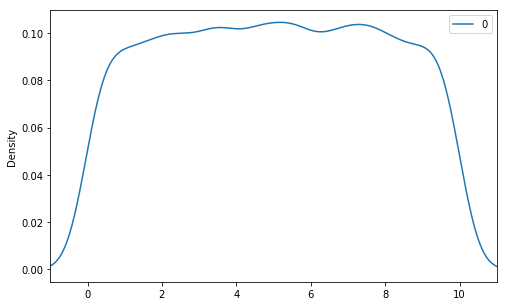

In [4]:
uniform_data = stats.uniform.rvs(size=10000, loc=0, scale=10)
pd.DataFrame(uniform_data).plot(kind='density', figsize=(8,5), xlim=(-1,11))

> **`cdf`** 叫做累计概率分布。其中 **`x`** 是我们要查看的位置。

In [6]:
stats.uniform.cdf?

In [5]:
stats.uniform.cdf(x=2.5, loc=0, scale=10)

0.25

> **`ppf`** 实际上是 **`cdf`** 的逆函数。实际上是考察的是在指定的累计概率值的对应的位置。其中 **`q`** 参数是quantial的意思。

In [8]:
stats.uniform.ppf(q=0.6, loc=0, scale=10)

6.0

> **`pdf`** 函数表示的是对应的点的值的概率的密度。 **(probability density)** 的意思。

In [9]:
stats.uniform.pdf(3, loc=0, scale=10)

0.10000000000000001

## 正态分布
[正态分布](https://baike.baidu.com/item/正态分布)<br/>
$$f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

In [10]:
import random

In [11]:
random.randint(0, 100)     # 生成的是整数

49

In [13]:
random.choice([1, 2, 3, 4, 5, 6])     # 在指定的数里面随机选择一个。

5

In [14]:
random.random()           # 普通的生成0到1之间的随机数。

0.8432791226768669

In [15]:
# 通过使用seed来保证每次生成的随机数相同
random.seed(2016)
print([random.uniform(0, 10) for x in range(4)])

[7.379250292770178, 4.487027599093537, 8.923718225399222, 8.753408330129322]


In [16]:
random.seed(2016)
print([random.uniform(0, 10) for x in range(4)])

[7.379250292770178, 4.487027599093537, 8.923718225399222, 8.753408330129322]


> 在使用 **`norm.cdf`** 方法里面的 **`loc`** 表示的均值，**`scale`** 表示的是方差。

In [17]:
prob_under_minusl = stats.norm.cdf(x=-1, loc=0, scale=1)
prob_over_1 = 1- stats.norm.cdf(x=1, loc=0, scale=1)
between_prob = 1 - (prob_under_minusl + prob_over_1)
print(prob_under_minusl, between_prob, prob_over_1)

0.158655253931 0.682689492137 0.158655253931


> 可以看到下面的画图是通过 **`fill_between`** 来进行部分的填充的，通过很密的点来进行的。

Text(1.4,0.03,'0.159')

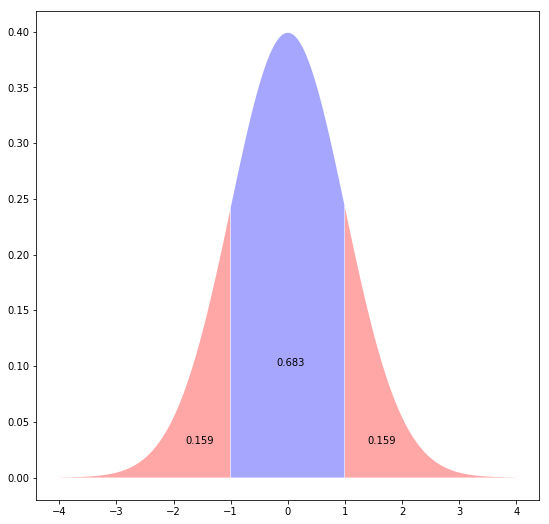

In [22]:
plt.rcParams['figure.figsize'] = (9, 9)
plt.fill_between(x=np.arange(-4, -1, 0.01), y1=stats.norm.pdf(np.arange(-4, -1, 0.01)), facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(1, 4, 0.01), y1=stats.norm.pdf(np.arange(1, 4, 0.01)), facecolor='red', alpha=0.35)
plt.fill_between(x=np.arange(-1, 1, 0.01), y1=stats.norm.pdf(np.arange(-1, 1, 0.01)), facecolor='blue', alpha=0.35)
plt.text(x=-1.8, y=0.03, s=round(prob_under_minusl, 3))
plt.text(x=-0.2, y=0.1, s=round(between_prob, 3))
plt.text(x=1.4, y=0.03, s=round(prob_over_1, 3))

In [24]:
print(stats.norm.ppf(q=0.025))
print(stats.norm.ppf(q=0.975))

-1.95996398454
1.95996398454


## binomial分布
[二项分布](https://baike.baidu.com/item/二项分布)<br/>
二项分布（Binomial Distribution），即重复n次的伯努利试验（Bernoulli Experiment），用$\eta$表示随机试验的结果。如果事件发生的概率是P,则不发生的概率q=1-p，N次独立重复试验中发生K次的概率
$$P(X=k)={n \choose k}p^k(1-p)^{n-k}=b(k;n,p)$$

> 其中的参数 **`n`** 表示进行多少次独立重复实验， **`p`** 表示事件发生的概率， **`size`** 表示的是整个事件发生的次数。

col_0   0   1    2     3     4     5     6     7    8   9   10
row_0                                                         
counts  10  88  424  1076  2065  2492  2070  1230  451  86   8


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1172b5a20>]], dtype=object)

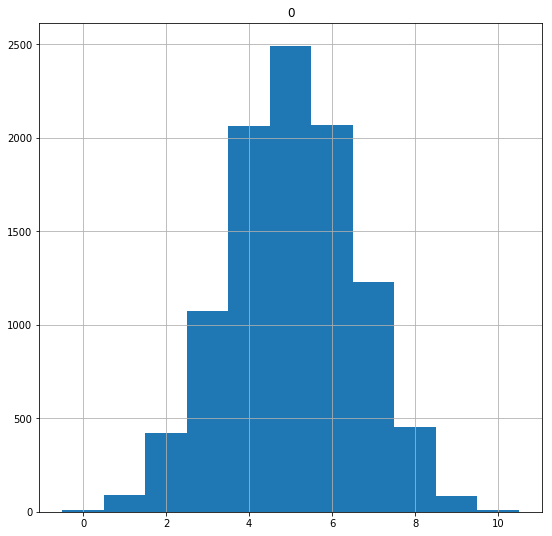

In [25]:
fair_coin_flips = stats.binom.rvs(size=10000, n=10, p=0.5)
print(pd.crosstab(index='counts', columns=fair_coin_flips))
pd.DataFrame(fair_coin_flips).hist(range=(-0.5, 10.5), bins=11)

In [26]:
fair_coin_flips    # 这个列表也就是我们正面的次数。

array([5, 7, 3, ..., 5, 4, 4])

col_0   3   4    5    6     7     8     9     10
row_0                                           
counts  11  50  253  919  2014  2982  2710  1061


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178f39e8>]], dtype=object)

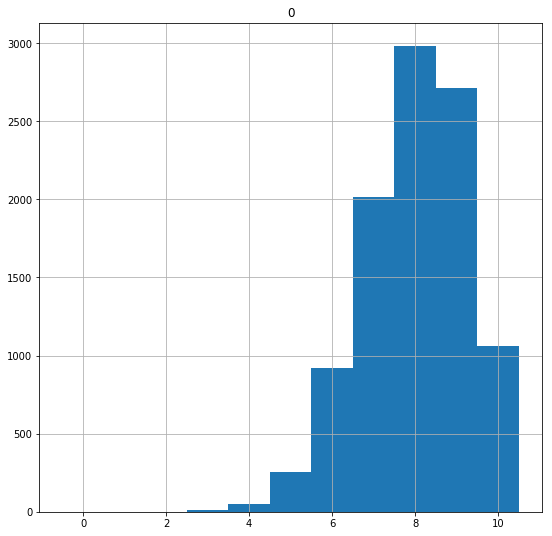

In [28]:
biased_coin_flip = stats.binom.rvs(n=10, p=0.8, size=10000)
print(pd.crosstab(index='counts', columns=biased_coin_flip))
pd.DataFrame(biased_coin_flip).hist(range=(-0.5, 10.5), bins=11)

> 在**`binom.cdf`** 的时候，参数 **`k`** 表示的是小于k次的发生概率。

In [29]:
stats.binom.cdf(k=5, n=10, p=0.8)     # k <= 5

0.032793497599999964

In [30]:
1 - stats.binom.cdf(k=8, n=10, p=0.8)    # k=9 or 10

0.37580963840000003

> 注意，这个地方的使用的是 **`pmf`** ，离散概率分布用 **probability mass** ,连续用 **probability density**。

In [31]:
stats.binom.pmf(k=5, n=10, p=0.8)

0.026424115200000039

In [32]:
stats.binom.ppf(q=0.03279, n=10, p=0.8)

5.0

## 几何分布
在n次伯努利试验中，试验k次才能得到第一次成功的机率。详细地说，是：前k-1次皆失败，第k次成功的概率。

col_0     1     2     3    4    5    6   7   8   9   10  11  12  15
row_0                                                              
counts  5020  2554  1187  624  324  140  84  36  20   4   3   3   1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117bfe240>]], dtype=object)

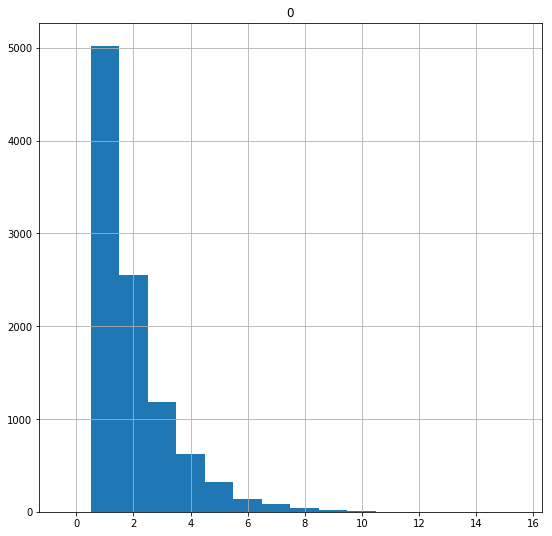

In [38]:
random.seed(2016)
flips_till_heads = stats.geom.rvs(size=10000, p=0.5)
print(pd.crosstab(index='counts', columns=flips_till_heads))
pd.DataFrame(flips_till_heads).hist(range=(-0.5, max(flips_till_heads) + 0.5), bins=max(flips_till_heads)+1)

In [39]:
first_five = stats.geom.cdf(k=5, p=0.5)
1 - first_five      # 这个是5次都不成功的概率

0.03125

In [40]:
stats.geom.pmf(k=2, p=0.5)

0.25